In [2]:
from quantum_optimal_control.helper_functions.grape_functions import transmon_gate
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control.core import hamiltonian

/software/python_ucs4-2.7.12-el7-x86_64/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import re, os, h5py, sys, math
from datetime import datetime

path = '/project/ftchong/qoc/pranav/'
file_name = datetime.today().strftime('%h%d')

Populating the interactive namespace from numpy and matplotlib


/software/python_ucs4-2.7.12-el7-x86_64/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
d = 2  # this is the number of energy levels to consider (i.e. d-level qudits)
max_iterations = 1000
decay =  max_iterations / 2
convergence = {'rate':0.02, 'max_iterations':max_iterations,
               'conv_target':1e-3, 'learning_rate_decay':decay}
reg_coeffs = {}

In [6]:
U = np.array([[ 0.15435964+0.02879184j, -0.36651249-0.06836352j,
          0.        +0.j        , -0.34298943-0.0639759j ,
          0.03619322+0.00675092j, -0.0859374 -0.01602942j,
          0.        +0.j        , -0.08042187-0.01500064j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
         -0.24155837-0.04505653j,  0.57355769+0.1069825j ,
          0.        +0.j        ,  0.53674631+0.10011628j],
        [ 0.        +0.j        ,  0.        +0.j        ,
         -0.52516669-0.0979564j ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
         -0.12313758-0.02296816j,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.82183665+0.15329258j,  0.        +0.j        ],
        [-0.48399397-0.09027668j, -0.2038379 -0.03802074j,
          0.        +0.j        ,  0.        +0.j        ,
         -0.11348368-0.02116747j, -0.04779455-0.00891485j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.7574052 +0.14127455j,  0.3189872 +0.05949889j,
          0.        +0.j        ,  0.        +0.j        ],
        [-0.31258963-0.05830559j,  0.55890096+0.10424866j,
          0.        +0.j        ,  0.52355698+0.09765615j,
         -0.00551769-0.00102918j,  0.01060584+0.00197825j,
          0.        +0.j        ,  0.00434069+0.00080964j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
         -0.18969458-0.03538267j,  0.33289765+0.06209353j,
          0.        +0.j        ,  0.36771901+0.06858857j],
        [ 0.63850575+0.1190969j ,  0.2249654 +0.04196153j,
          0.        +0.j        ,  0.20552438+0.03833531j,
          0.14911778+0.0278141j , -0.33036586-0.06162129j,
          0.        +0.j        , -0.25612389-0.04777335j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.32700627+0.06099465j,  0.33965596+0.06335412j,
          0.        +0.j        , -0.21578385-0.04024895j],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.22441165+0.04185825j,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
         -0.95708819-0.17852029j,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.13804212+0.02574822j,  0.20408945+0.03806766j,
          0.        +0.j        , -0.15596166-0.02909065j,
         -0.8236366 -0.15362832j, -0.31265925-0.05831858j,
          0.        +0.j        , -0.03656885-0.00682098j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.08170125+0.01523928j, -0.19399195-0.03618423j,
          0.        +0.j        ,  0.24406538+0.04552415j],
        [ 0.05688748+0.0106109j , -0.135074  -0.0251946j ,
          0.        +0.j        ,  0.16993946+0.03169785j,
         -0.24261814-0.0452542j ,  0.57607404+0.10745186j,
          0.        +0.j        , -0.72477096-0.13518746j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
         -0.28894168-0.05389467j,  0.68606492+0.12796784j,
          0.        +0.j        ,  0.64203273+0.11975477j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.98304547+0.18336196j,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.90597536+0.1689865j ,  0.3815587 +0.07117001j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.24919821+0.04648155j, -0.59169779-0.11036607j,
          0.        +0.j        ,  0.74442754+0.1388539j ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.35046147+0.06536961j,  0.05474569+0.01021141j,
          0.        +0.j        ,  0.04868376+0.00908071j,
         -0.24573177-0.04583497j,  0.59553998+0.11108273j,
          0.        +0.j        ,  0.5843357 +0.10899286j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.13448462+0.02508466j,  0.24922051+0.0464857j ,
          0.        +0.j        , -0.03861082-0.00720186j],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.80013608+0.1492449j ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.18761057+0.03499395j,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.53940978+0.10061308j,  0.        +0.j        ],
        [ 0.12901096+0.02406369j,  0.36425303+0.06794208j,
          0.        +0.j        , -0.33117406-0.06177204j,
          0.36060589+0.06726179j,  0.22453978+0.04188215j,
          0.        +0.j        , -0.07765148-0.0144839j ,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.38469417+0.07175485j, -0.32297726-0.06024314j,
          0.        +0.j        ,  0.51825636+0.09666745j],
        [ 0.20283139+0.037833j  , -0.48160413-0.08983092j,
          0.        +0.j        ,  0.60591636+0.11301818j,
          0.04755855+0.00887083j, -0.11292332-0.02106295j,
          0.        +0.j        ,  0.14207123+0.02649975j,
          0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ,
          0.13673829+0.02550503j, -0.32467225-0.06055929j,
          0.        +0.j        ,  0.40847704+0.07619093j]])


In [7]:
N = 4
connected_qubit_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
H0 = hamiltonian.get_H0(N, d, connected_qubit_pairs)
Hops, Hnames = hamiltonian.get_Hops_and_Hnames(N, d)
states_concerned_list = hamiltonian.get_full_states_concerned_list(N, d)
maxA = hamiltonian.get_maxA(N, d)
U = transmon_gate(U, d)

In [ ]:
total_time = 1930.4
steps = int(total_time * 20)
uks, U_f = Grape(H0, Hops, Hnames, U, total_time, steps, states_concerned_list, convergence,
                 reg_coeffs=reg_coeffs,
                 use_gpu=False, sparse_H=False, method='ADAM', maxA=maxA,
                 show_plots=False, file_name=file_name, data_path = path)

data saved at: /project/ftchong/qoc/pranav/00122_Feb09.h5
Using 7 Taylor terms and 6 Scaling & Squaring terms
Building graph:
Propagators initialized.
Operators weight initialized.
Intermediate propagation variables initialized.
Intermediate propagators initialized.
Vectors initialized.
Training loss initialized.


In [ ]:
%pylab inline
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import h5py
import sys
import math

path = '../../pulses/output_pulses/'

In [2]:
from quantum_optimal_control.helper_functions.grape_functions import transmon_gate
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control.core import hamiltonian

In [3]:
N = 4
d = 2  # this is the number of energy levels to consider (i.e. d-level qudits)

connected_qubit_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

H0 = hamiltonian.get_H0(N, d, connected_qubit_pairs)
Hops, Hnames = hamiltonian.get_Hops_and_Hnames(N, d)

total_time = 40.0
steps = 4000

states_concerned_list = hamiltonian.get_full_states_concerned_list(N, d)

In [4]:
U = np.array([[1/math.sq]])
U = transmon_gate(U, d)

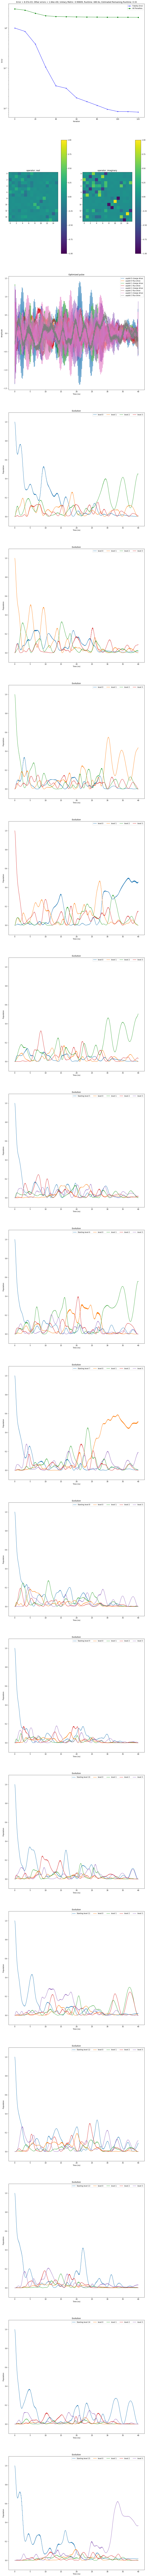

In [ ]:
max_iterations = 200
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-4,'learning_rate_decay':decay}
reg_coeffs = {'speed_up': 0.001}
uks, U_f = Grape(H0, Hops, Hnames, U, total_time, steps, states_concerned_list, convergence,
                 reg_coeffs=reg_coeffs,
                 use_gpu=True, sparse_H=False, method='L-BFGS-B', maxA=[2*np.pi*0.3] * len(Hops),
                 show_plots = True, file_name='Feb7', data_path = path)

data saved at: ../pulses/output_pulses/00004_Feb3_1.h5


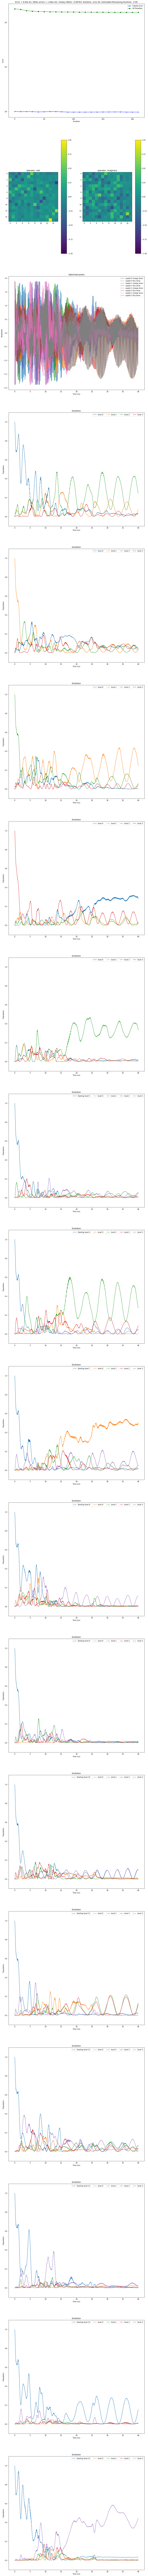

In [14]:
max_iterations = 200
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-4,'learning_rate_decay':decay}
reg_coeffs = {'speed_up': 0.1}
uks, U_f = Grape(H0, Hops, Hnames, U, total_time, steps, states_concerned_list, convergence,
                 reg_coeffs=reg_coeffs,
                 use_gpu=True, sparse_H=False, method='L-BFGS-B', maxA=[2*np.pi*0.3] * len(Hops),
                 show_plots = True, file_name='Feb3_1', data_path = path)

data saved at: ../pulses/output_pulses/00005_Feb3_1.h5


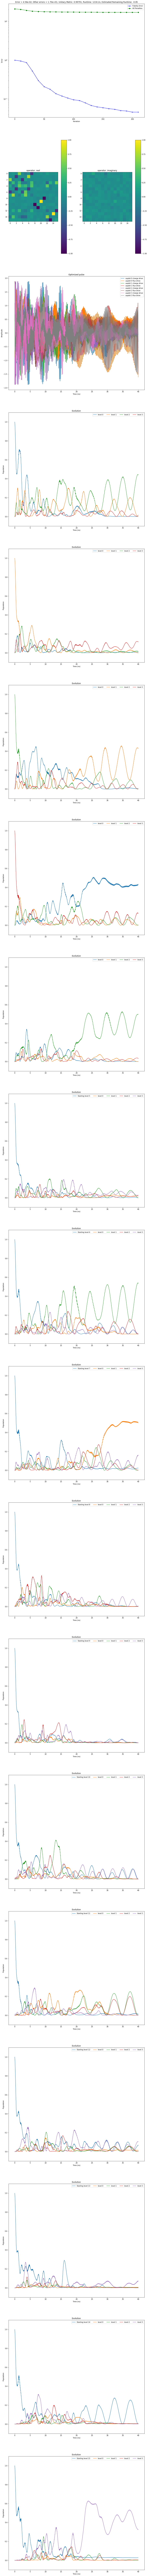

In [26]:
max_iterations = 200
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-4,'learning_rate_decay':decay}
reg_coeffs = {'speed_up': 0.01}
uks, U_f = Grape(H0, Hops, Hnames, U, total_time, steps, states_concerned_list, convergence,
                 reg_coeffs=reg_coeffs,
                 use_gpu=True, sparse_H=False, method='L-BFGS-B', maxA=[2*np.pi*0.3] * len(Hops),
                 show_plots = True, file_name='Feb3_1', data_path = path)

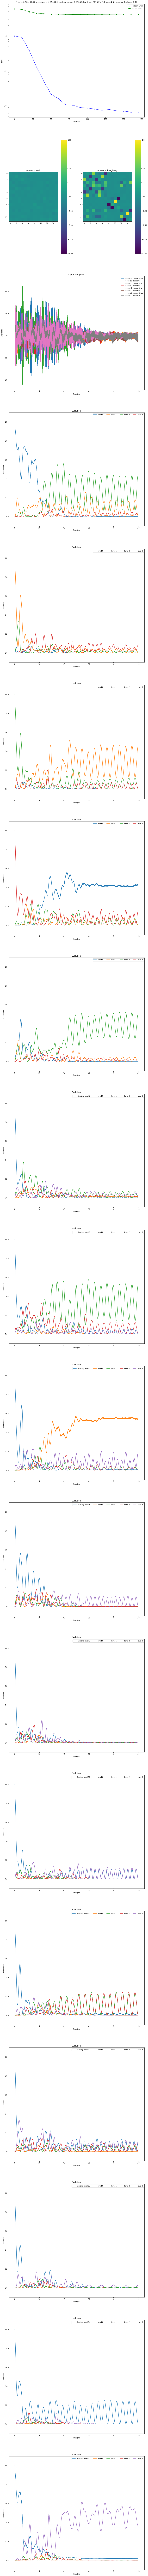

In [ ]:
total_time = 100.0
steps = 10000
max_iterations = 200
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-4,'learning_rate_decay':decay}
reg_coeffs = {'speed_up': 0.001}
uks, U_f = Grape(H0, Hops, Hnames, U, total_time, steps, states_concerned_list, convergence,
                 reg_coeffs=reg_coeffs,
                 use_gpu=True, sparse_H=False, method='L-BFGS-B', maxA=[2*np.pi*0.3] * len(Hops),
                 show_plots = True, file_name='Feb3_1', data_path = path)

In [65]:
def fidelity_plot(filename, target_fidelity, ylines=[0.9, 0.95, 0.99]):
    with h5py.File(path+filename,'r') as hf:  
        assert hf.get('uks') != None
        speed_up_uks = np.array(hf.get('uks'))[-1]/(2*np.pi)
        speed_up_traj = np.array(hf.get('inter_vecs_mag_squared'))[-1]

        inter_vecs_real = np.array(hf.get('inter_vecs_real'))[-1]
        inter_vecs_imag = np.array(hf.get('inter_vecs_imag'))[-1]
        psi = inter_vecs_real + 1j * inter_vecs_imag

        total_time = np.array(hf.get('total_time'))[()]  # 0-D array indexing

        err = np.array(hf.get('error'))
        print 'error:', err[-1]
        target_U = np.array(hf.get('U'))
        print('total time: %s ns' % total_time)
        assert total_time != None

        time = np.linspace( float(total_time)/inter_vecs_real.shape[-1],float(total_time),inter_vecs_real.shape[-1])

        all_U_arr = []

        for ii in range(psi.shape[0]): 
            init_vec = np.zeros(psi.shape[0])
            init_vec[ii] = 1

            U_list = []
            for jj in range(psi.shape[-1]):
                U_jj = np.outer(psi[ii,:,jj],init_vec)
                U_list.append(U_jj)

            all_U_arr.append(np.array(U_list))


        all_U = np.sum(all_U_arr,axis=0)

        fidelity_tlist = []

        for U in all_U:
            fidelity = (abs(np.trace(np.dot(np.transpose(np.conjugate(target_U)), U))))/all_U.shape[1]
            fidelity_tlist.append(fidelity)

        fidelity_tarr = np.array(fidelity_tlist)
        target_reached_tarr = fidelity_tarr > target_fidelity

        target_reached_tarr_ind = [i for i, x in enumerate(target_reached_tarr) if x]
        assert len(target_reached_tarr_ind)>0, 'did not converge to target fidelity'
        target_reached_shortest_t = time[target_reached_tarr_ind[0]]
        print 'shortest time:', target_reached_shortest_t 

        plt.figure(figsize=(20,10))
        plt.plot(time, fidelity_tarr)
        for y in ylines:
            plt.axhline(y=y, color='r', linestyle='-')
        plt.yscale('log')
        plt.ylim(0.5, 1.0)

error: 0.006785631
total time: 40.0 ns
shortest time: 39.80004998750312


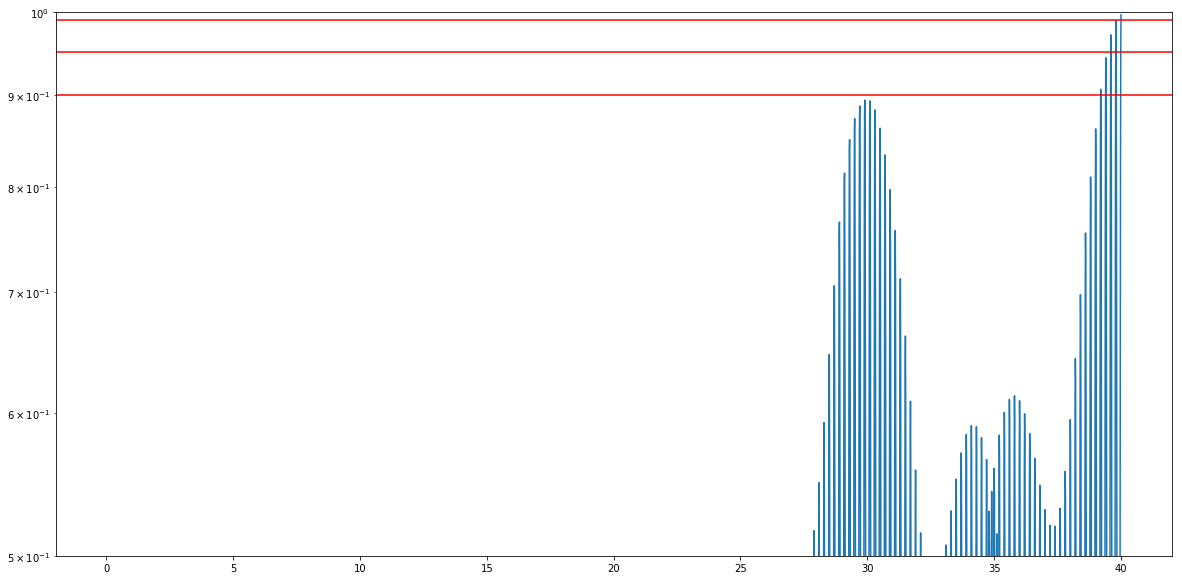

In [66]:
fidelity_plot('00003_Feb3_1.h5', 0.98)
# .001 speedup

In [ ]:
fidelity_plot('00004_Feb3_1.h5', 0.96)
# .1 speedup

error: 0.045618773
total time: 40.0 ns
shortest time: 29.322669332666834


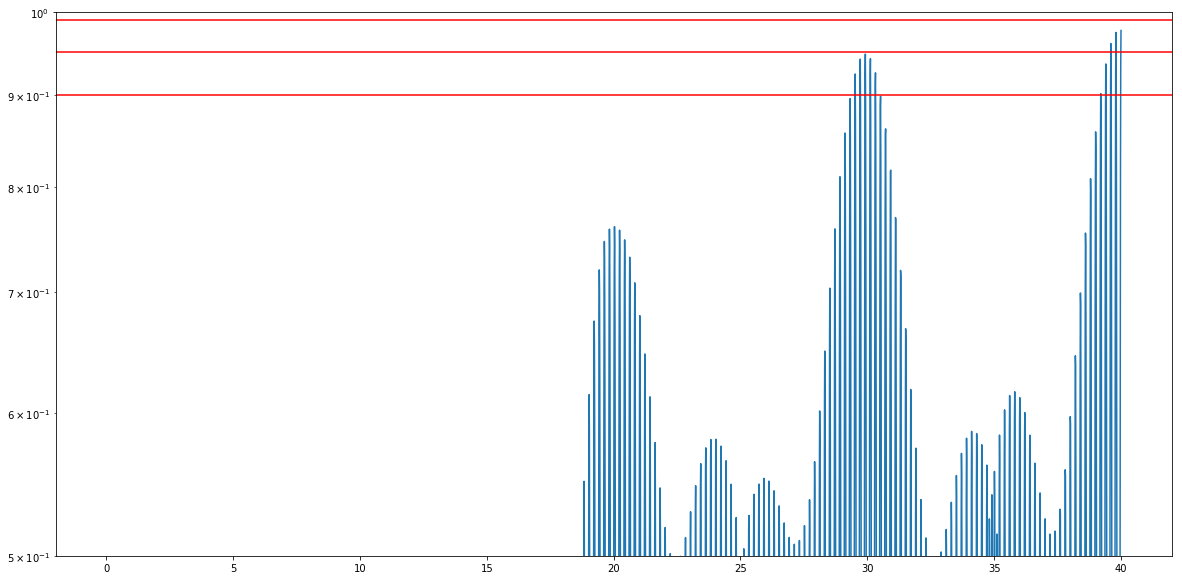

In [68]:
fidelity_plot('00005_Feb3_1.h5', 0.88)
# .01 speedup

error: 0.006719947
total time: 100.0 ns
shortest time: 49.48505149485051


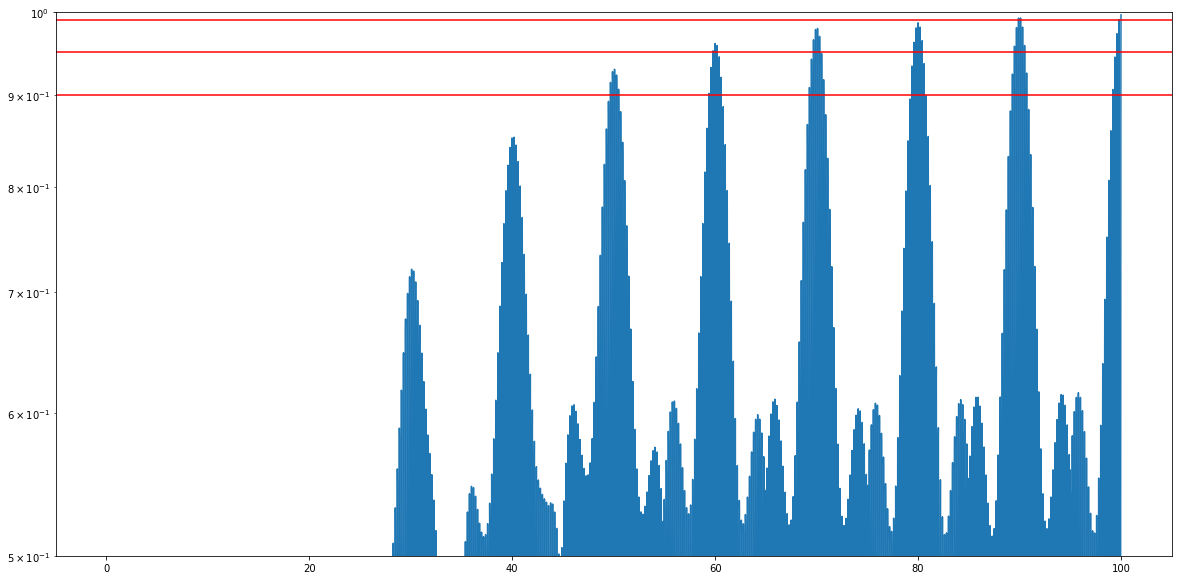

In [69]:
fidelity_plot('00006_Feb3_1.h5', 0.88)
# 100ns, .01 speedup